<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson8_GradientDescentPro/GradientDescentPro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск

Пишем градиентный спуск для линейной регрессии.

Сгенерируем выборку для задачи регрессии и визуализируем данные

(100,)
(100, 1)


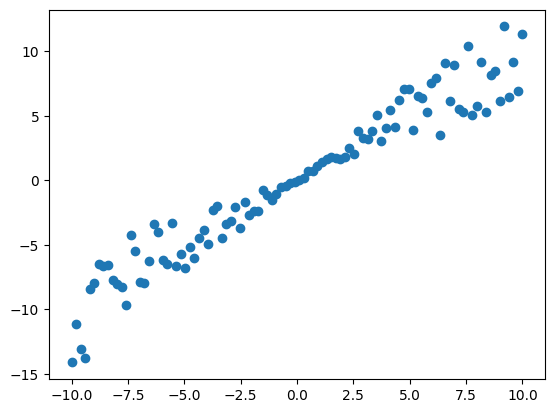

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y)

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [2]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

In [3]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели

In [4]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

Применим градиентный спуск

In [5]:
track, weights = gradient_descent(X, y, 0.01, 100)

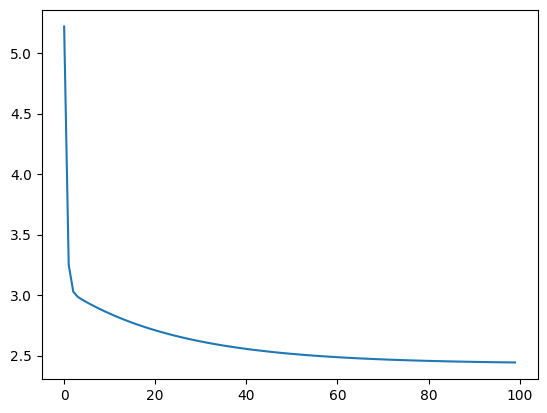

In [6]:
plt.plot(track)

Сделаем предсказание

In [7]:
pred = predict(X, weights)

Добавим к графику полученную регрессионную прямую

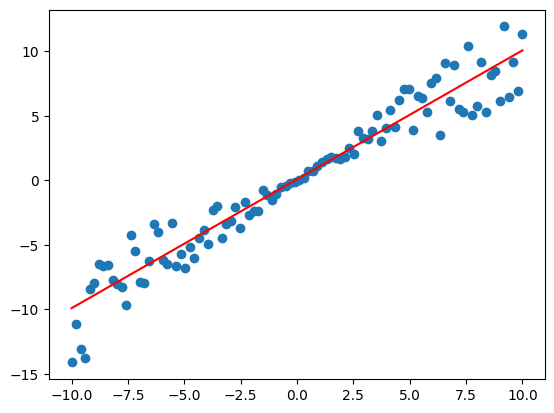

In [8]:
plt.scatter(X, y)
plt.plot(X, pred, '-', c = 'r')

# Модификации градиентного спуска в sklearn

В scikit-learn (sklearn) нет прямой реализации алгоритмов оптимизации, таких как Momentum, Adagrad, Adadelta, Adam, как в специализированных библиотеках для глубокого обучения (например, TensorFlow или PyTorch). Однако, в sklearn есть возможности для использования градиентного спуска с некоторыми вариациями.

Модификации градиентного спуска в sklearn
Stochastic Gradient Descent (SGD): В scikit-learn есть класс SGDClassifier и SGDRegressor, которые используют стохастический градиентный спуск (SGD). Эти алгоритмы можно настроить с различными гиперпараметрами для реализации модификаций градиентного спуска. Например, можно использовать Momentum, Nesterov Accelerated Gradient (NAG) и другие методы через параметр penalty и learning_rate.

Momentum: В sklearn в SGDClassifier и SGDRegressor есть параметр momentum, который позволяет использовать метод с импульсом (Momentum). Это добавляет к текущему обновлению градиента некоторую долю предыдущего обновления, что ускоряет схождение и помогает избежать локальных минимумов.

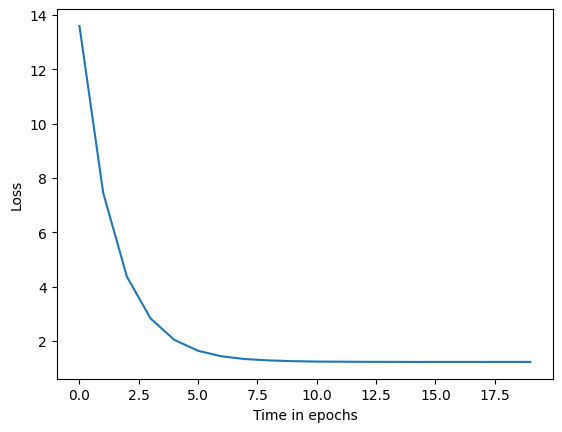

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
import sys
from io import StringIO

def fit_and_plot(model, X, y):
    # Обучаем SGDRegressor
    # Для отслеживания функции потерь на каждой итерации воспользуемся методом verbose
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()

    model.fit(X, y)

    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()

    loss_list = []
    for line in loss_history.split('\n'):
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.append(float(line.split("loss: ")[-1]))

    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Time in epochs")
    plt.ylabel("Loss")

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, verbose=1, learning_rate='constant', eta0=0.0001)
fit_and_plot(sgd_regressor, X, y)

<Axes: >

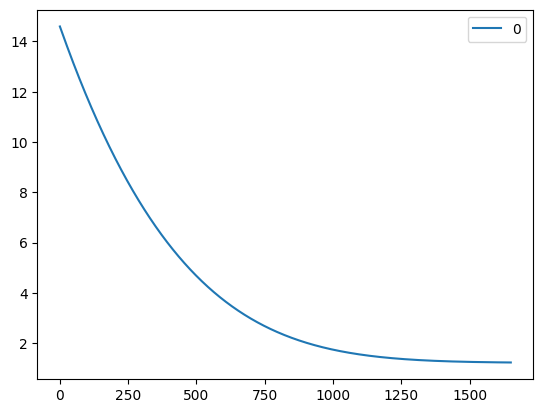

In [11]:
from sklearn.neural_network import MLPRegressor
import pandas as pd

model = MLPRegressor(solver='adam',
                    alpha=0.5,
                    max_iter=10000,
                    hidden_layer_sizes=())

model.fit(X, y)

pd.DataFrame(model.loss_curve_).plot()

В SGDClassifier или SGDRegressor через параметр learning_rate можно использовать несколько типов схем изменения скорости обучения:

* 'constant': постоянная скорость обучения.

* 'optimal': оптимальная скорость обучения, которая выбирается автоматически (близко к подходу Adagrad и Adadelta).

* 'invscaling': скорость обучения уменьшается с каждым шагом, но со временем (аналогично адаптивному подходу).

* 'adaptive': скорость обучения изменяется в зависимости от предыдущих обновлений градиентов.

Из документации

The learning rate schedule:

* `constant`: eta = eta0

* `optimal`: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.

* `invscaling`: eta = eta0 / pow(t, power_t)

* `adaptive`: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.

Adagrad использует индивидуальные скорости обучения для каждого параметра, которые адаптируются с течением времени в зависимости от величины градиента. Чтобы добиться похожего эффекта в scikit-learn, нужно использовать параметр learning_rate='optimal', который позволит автоматически подобрать подходящую скорость обучения.

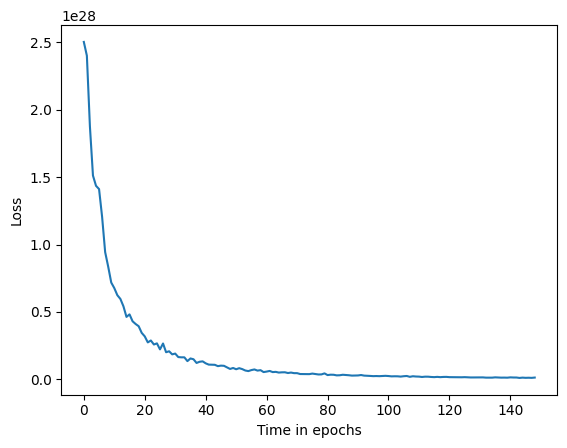

In [12]:
from sklearn.linear_model import SGDClassifier

model = SGDRegressor(max_iter=1000, tol=1e-3, verbose=1, learning_rate='optimal', eta0=0.01)
fit_and_plot(model, X, y)

При этом важно понимать, что scikit-learn не реализует полную адаптивность на уровне каждого параметра, как в Adagrad, но метод optimal автоматически подбирает скорость обучения, что может дать некоторое приближение.

В Adadelta скорость обучения адаптируется на основе квадратов прошлых градиентов, что делает её более устойчивой и эффективной по сравнению с Adagrad, особенно на долгосрочной дистанции, поскольку она использует скользящее среднее квадратов градиентов.

Для имитации Adadelta в scikit-learn можно использовать параметр learning_rate='adaptive', который также адаптирует скорость обучения, хотя и не в точности так же, как это делает Adadelta.

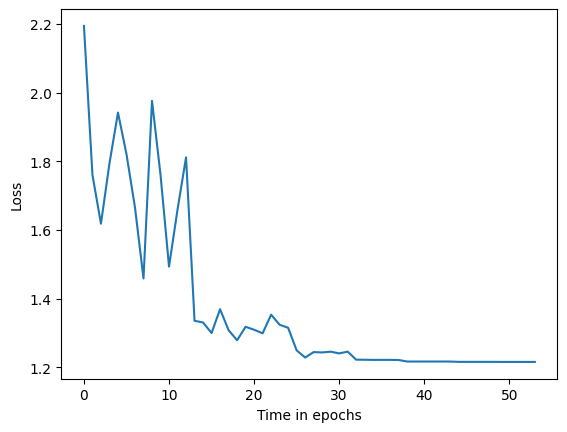

In [13]:
from sklearn.linear_model import SGDClassifier

model = SGDRegressor(max_iter=1000, tol=1e-3, verbose=1, learning_rate='adaptive', eta0=0.01)
fit_and_plot(model, X, y)